In [1]:
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython
from IPython.display import display

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import train_lstm
import models

In [2]:
import importlib
importlib.reload(train_lstm)
importlib.reload(models)

<module 'models' from 'C:\\Users\\jakub\\Documents\\DATA\\Indv_proj\\code\\models.py'>

## Define Model

In [7]:
seed = 1289719
series_min_len = 144 #12hrs
pred_horizon = 12 # 1hr
input_size = series_min_len - pred_horizon
output_size = pred_horizon

# Hyper-parameters
hidden_size = 8 #The number of features in the hidden state h
num_layers = 3 #number of stacked layers
drop_out = 0

# model_name = "saves/all_data/"+str(num_layers)+"_layer/lstm_hid"+str(hidden_size)+"_drop01_"
model_name = "saves/outputs/lstm_hid8_output"
# dataset_path = 'timeseries_all-patients_step-1_len-6391075.pkl'
dataset_path = 'timeseries_all-patients_step-144_len-49769.pkl'

# group_id = 2
# model_name = "saves/grouped/hba1c-bmi/"+str(num_layers)+"_layer_"+str(group_id)+"/lstm_hid"+str(hidden_size)+"_"
# dataset_path = "timeseries_"+str(group_id)+"-patients_step-1.pkl"

In [8]:
epochs = 20
batch_size = 128
learning_rate = 0.001
save_every = 1
test_every = save_every

epoch_start = 0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    print('Training on GPU!')
else:
    print('No GPU available, training on CPU; consider making n_epochs very small.')

lstm_trainer = train_lstm.LSTM_Trainer(seed, device)

Training on GPU!


## Training

In [6]:
lstm_trainer.load_train(dataset_path, batch_size, input_size, pred_horizon)

In [7]:
lstm = models.LSTM(1, 1, num_layers, hidden_size, drop_out, learning_rate).to(device)
loss_func = nn.MSELoss()
optimizer= torch.optim.Adam(lstm.parameters(), lr=learning_rate)
# optimiser = optim.LBFGS(model.parameters(), lr=0.08)

lstm_trainer.set_model(lstm, loss_func, optimizer)


In [ ]:
epoch_start = 0

In [8]:
#Load Weights
epoch_load = 9
epoch_start = lstm_trainer.load_weights(model_name+str(epoch_load)+".pt")

In [9]:
#Training Loop

import time
for epoch in range(epoch_start+1, epochs+1):
    start = time.time()
    print(f"Epoch {epoch}\n---------")
    lstm_trainer.train()
    end = time.time()
    print(end-start)

    #save model
    if epoch % save_every == 0:
        print("SAVING")
        torch.save({
            'epoch': epoch,
            'model_state_dict':lstm.state_dict(),
            'optimizer_state_dict':optimizer.state_dict()
        }, model_name+str(epoch)+".pt")

    #test model
    # if epoch % test_every == 0:
        # lstm_trainer.test(500)
    print()

Epoch 9
---------
Train loss: 21.66812293053915
347.2015130519867
SAVING

Epoch 10
---------
Train loss: 21.515552014046815
342.42006039619446
SAVING

Epoch 11
---------
Train loss: 3104.40071922093
357.02722573280334
SAVING

Epoch 12
---------
Train loss: 6953.678932989095
357.0648498535156
SAVING

Epoch 13
---------
Train loss: 5721.927470978672
356.5792465209961
SAVING

Epoch 14
---------
Train loss: 146.0393692146865
357.3381612300873
SAVING

Epoch 15
---------
Train loss: 2182.608349182647
364.2921621799469
SAVING

Epoch 16
---------
Train loss: 195.58443508123364
364.00043964385986
SAVING

Epoch 17
---------
Train loss: 39.41293449285344
363.2556505203247
SAVING

Epoch 18
---------
Train loss: 26.267129870113333
352.1173167228699
SAVING

Epoch 19
---------
Train loss: 31.484850062771024
355.38667130470276
SAVING

Epoch 20
---------
Train loss: 648.5622192809607
355.9535448551178
SAVING



In [ ]:
e = 2
torch.save({
    'epoch': e,
    'model_state_dict':lstm.state_dict(),
    'optimizer_state_dict':optimizer.state_dict()
}, model_name+str(e)+".pt")


In [ ]:
lstm_trainer.clear()

## Testing

In [6]:
importlib.reload(train_lstm)
lstm_trainer = train_lstm.LSTM_Trainer(seed, device)

In [9]:
#load test set
lstm_trainer.load_test(dataset_path, 1024, input_size, pred_horizon, 0)

In [10]:
# tests = [{'hidden_size': 8, 'layer': 3, 'epoch': 1},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 2},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 3},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 4},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 5},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 6},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 7},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 8},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 9},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 10},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 11},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 12},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 13},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 14},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 15},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 16},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 17},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 18},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 19},
#          {'hidden_size': 8, 'layer': 3, 'epoch': 20}]

tests = [{'hidden_size': 8, 'layer': 3, 'epoch': 8}]

import time



for test in tests:
    print(test)
    hidden_size = test['hidden_size']
    epoch_load = test['epoch']
    num_layers = test['layer']
    # group_id = test['group']

    #define model
    lstm = models.LSTM(1, 1, num_layers, hidden_size, drop_out, learning_rate).to(device)
    loss_func = nn.MSELoss()
    optimizer= torch.optim.Adam(lstm.parameters(), lr=learning_rate)
    lstm_trainer.set_model(lstm, loss_func, optimizer)

    #load weights
    model_name = "saves/all_data/lstm_hid"+str(hidden_size)+"_layer3_drop0_"
    # model_name = "saves/grouped/hba1c-bmi/"+str(num_layers)+"_layer_"+str(group_id)+"/lstm_hid"+str(hidden_size)+"_"
    lstm_trainer.load_weights(model_name+str(epoch_load)+".pt")

    # print(sum(p.numel() for p in lstm.parameters()))
    # print(sum(p.numel() for p in lstm.parameters() if p.requires_grad))

    # test and time
    start = time.time()
    log = lstm_trainer.test(500)
    end = time.time()
    print(end-start)

{'hidden_size': 8, 'layer': 3, 'epoch': 8}
MSE loss: 852.0237058227666
18.66484308242798


In [11]:
import pickle
pickle.dump(log, open('saves/outputs/lstm_hid8_output_small.pkl', 'wb'))

In [122]:
#ESOD

import math
esod = 0
for i in range (0, len(log)):
    pred = log[i][0]
    y = log[i][1]

    esod_pred = 0
    esod_y = 0
    for j in range(2, len(pred)):
        esod_pred += math.pow((pred[j] - 2*pred[j-1] + pred[j-2]), 2)
        esod_y += math.pow((y[j] - 2*y[j-1] + y[j-2]), 2)
    if (esod_y != 0):
        esod += esod_pred / esod_y

print("avg ESOD:", esod/len(log))

avg ESOD: 0.1216526160364409


In [ ]:
esod_pred = 0

132


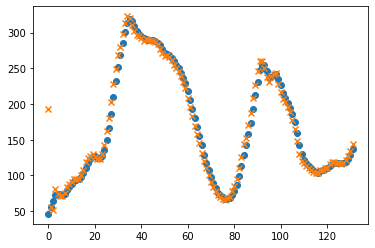

In [5]:
X = [ 46.,  55.,  64.,  73.,  74.,  74.,  73.,  74.,  79.,  84.,  88.,  92.,
94.,  95.,  98., 103., 111., 118., 123., 127., 127., 125., 124., 127.,
135., 149., 166., 186., 210., 232., 252., 268., 285., 301., 314., 319.,
316., 309., 302., 298., 295., 292., 291., 290., 290., 289., 288., 286.,
282., 277., 272., 270., 268., 265., 260., 255., 250., 244., 237., 229.,
218., 206., 193., 180., 168., 155., 142., 129., 118., 108.,  98.,  89.,
82.,  76.,  72.,  69.,  67.,  67.,  68.,  72.,  78.,  87.,  99., 113.,
129., 142., 158., 174., 193., 212., 231., 247., 255., 254., 246., 238.,
238., 240., 242., 235., 226., 216., 209., 202., 195., 186., 175., 160.,
143., 130., 122., 117., 113., 110., 107., 105., 104., 106., 107., 109.,
110., 113., 116., 118., 118., 118., 117., 117., 119., 123., 129., 137.]

pred = [193.6785,  56.0964,  51.8710,  80.2566,  73.5541,  71.1381,  71.6078,
        75.0809,  84.3357,  87.4930,  90.4614,  95.1131,  95.1361,  95.5744,
        101.0354, 107.9372, 118.7473, 124.1407, 126.7885, 130.2184, 126.4054,
        122.8202, 123.3869, 130.4462, 142.9191, 162.1062, 180.7302, 202.0931,
        227.9289, 249.4901, 268.0135, 280.1395, 297.9261, 313.1545, 322.9258,
        320.1580, 311.0115, 302.3672, 296.4103, 295.3190, 292.6397, 288.7579,
        290.4130, 289.1791, 289.6539, 287.6734, 286.7941, 283.6561, 277.5372,
        271.8318, 267.4391, 268.4200, 265.8665, 261.5781, 255.1380, 250.7857,
        245.9087, 238.8817, 230.7215, 221.7852, 207.9848, 196.1792, 182.5964,
        169.0746, 158.2109, 145.1066, 131.3689, 119.6674, 110.4299, 100.9340,
        90.6125,  83.2090,  78.3334,  72.6629,  69.8191,  67.3750,  66.1550,
        68.2259,  70.2004,  77.6719,  84.8762,  95.2254, 109.7273, 126.1296,
        143.6051, 152.7384, 170.3281, 187.8651, 208.1371, 226.9946, 246.0975,
        259.6434, 259.8273, 251.0414, 238.3893, 231.1711, 239.3188, 242.0546,
        243.4035, 227.9903, 217.1566, 207.4139, 203.4830, 196.1950, 188.9890,
        178.1659, 165.2526, 148.6429, 130.2570, 120.5593, 116.8088, 113.6773,
        109.9583, 107.5505, 104.3979, 103.3118, 103.2427, 108.1524, 107.6470,
        110.6267, 110.6828, 115.7255, 118.7638, 119.4035, 117.5617, 117.9306,
        116.0492, 117.0740, 121.1893, 127.0235, 134.7721, 144.0739]

plt.scatter(range(0,132), X, marker='o')
plt.scatter(range(0,132), pred, marker='x')

In [ ]:
lstm_trainer.clear()